In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path


file_path = Path(r"D:\Infosys SpringBoard\data kaggle\Indian_Kids_Screen_Time.csv")
df = pd.read_csv(file_path)


print("Shape:", df.shape)
display(df.head())
display(df.dtypes)


Shape: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [2]:
# Remove exact duplicate rows
df = df.drop_duplicates(keep='first')
print("After dropping exact duplicates, shape:", df.shape)
df.head()

After dropping exact duplicates, shape: (9668, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
#Trim whitespace and normalize string columns
str_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in str_cols:
    df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})
    df[c] = df[c].where(df[c].isna(), df[c].str.lower())


if 'gender' in df.columns:
    gender_map = {
        'boy': 'male', 'm': 'male', 'male': 'male',
        'girl': 'female', 'f': 'female', 'female': 'female'
    }
    df['gender'] = df['gender'].map(gender_map).fillna(df['gender'])  # keep others unchanged
    print("Gender value counts after mapping:")
    display(df['gender'].value_counts(dropna=False))
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,male,3.99,smartphone,True,0.42,"poor sleep, eye strain",urban
1,11,female,4.61,laptop,True,0.30,poor sleep,urban
2,18,female,3.73,tv,True,0.32,poor sleep,urban
3,15,female,1.21,laptop,False,0.39,NaN,urban
4,12,female,5.89,smartphone,True,0.49,"poor sleep, anxiety",urban


In [5]:

def decimal_hours_to_hhmm(decimal_hours):
    if pd.isna(decimal_hours):
        return np.nan
    try:
        total_minutes = int(round(decimal_hours * 60))
        hours = total_minutes // 60
        minutes = total_minutes % 60
        return f"{hours:d}:{minutes:02d}"
    except Exception:
        return np.nan

if 'Avg_Daily_Screen_Time_hr' in df.columns:
    
    original_values = df['Avg_Daily_Screen_Time_hr'].copy()
    
    
    df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].apply(decimal_hours_to_hhmm)
    
    
    print("Screen time converted from decimal hours to hh:mm format:")
    display(df[['Avg_Daily_Screen_Time_hr']].head(10))
    
 

Screen time converted from decimal hours to hh:mm format:


,Avg_Daily_Screen_Time_hr
0,3:59
1,4:37
2,3:44
3,1:13
4,5:53
5,4:53
6,2:58
7,2:44
8,4:37
9,3:14


In [6]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,male,3:59,smartphone,True,0.42,"poor sleep, eye strain",urban
1,11,female,4:37,laptop,True,0.30,poor sleep,urban
2,18,female,3:44,tv,True,0.32,poor sleep,urban
3,15,female,1:13,laptop,False,0.39,NaN,urban
4,12,female,5:53,smartphone,True,0.49,"poor sleep, anxiety",urban


In [7]:

print("Final shape:", df.shape)
print("Final missing counts:")
display(df.isna().sum().sort_values(ascending=False).head(30))

#  Save cleaned dataset
clean_path = file_path.parent / (file_path.stem + "_cleaned.csv")
df.to_csv(clean_path, index=False)
print("Cleaned file saved to:", clean_path)


Final shape: (9668, 8)
Final missing counts:


Health_Impacts                       3180
Age                                     0
Avg_Daily_Screen_Time_hr                0
Gender                                  0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Urban_or_Rural                          0
dtype: int64

Cleaned file saved to: D:\Infosys SpringBoard\data kaggle\Indian_Kids_Screen_Time_cleaned.csv


In [16]:
df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].fillna(0)

# Visualization


# parents

In [31]:
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

age_options = df['Age'].dropna().unique().tolist()
device_options = df['Primary_Device'].dropna().unique().tolist()

age_dropdown = widgets.Dropdown(options=age_options, description='Age:')
device_dropdown = widgets.Dropdown(options=device_options, description='Device:')

def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct >= 4 else ''  # show only if ≥4%

def plot_pie(age_group, device):
    filtered_df = df[(df['Age'] == age_group) & (df['Primary_Device'] == device)]

    if filtered_df.empty:
        print(" No data available for this combination.")
        return

    impact_counts = filtered_df['Health_Impacts'].value_counts()

    # Pie chart
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, _, autotexts = ax.pie(
        impact_counts,
        labels=None,
        autopct=autopct_format, 
        startangle=140,
        wedgeprops=dict(width=0.4)
    )

   
    ax.legend(
        wedges,
        impact_counts.index,
        title="Health Impacts",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

    ax.set_title(f'Health Impacts for Age {age_group} using {device}', fontsize=14, fontweight='bold')
    plt.show()


interact(plot_pie, age_group=age_dropdown, device=device_dropdown)


interactive(children=(Dropdown(description='Age:', options=(14, 11, 18, 15, 12, 17, 10, 13, 9, 8, 16), value=1…

<function __main__.plot_pie(age_group, device)>

In [38]:
def hhmm_to_hours(hhmm):
    try:
        h, m = map(int, str(hhmm).split(':'))
        return round(h + m / 60, 2)
    except:
        return None  # or np.nan
df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].apply(hhmm_to_hours)

# chart for Screen Time vs Education to recreation ratio

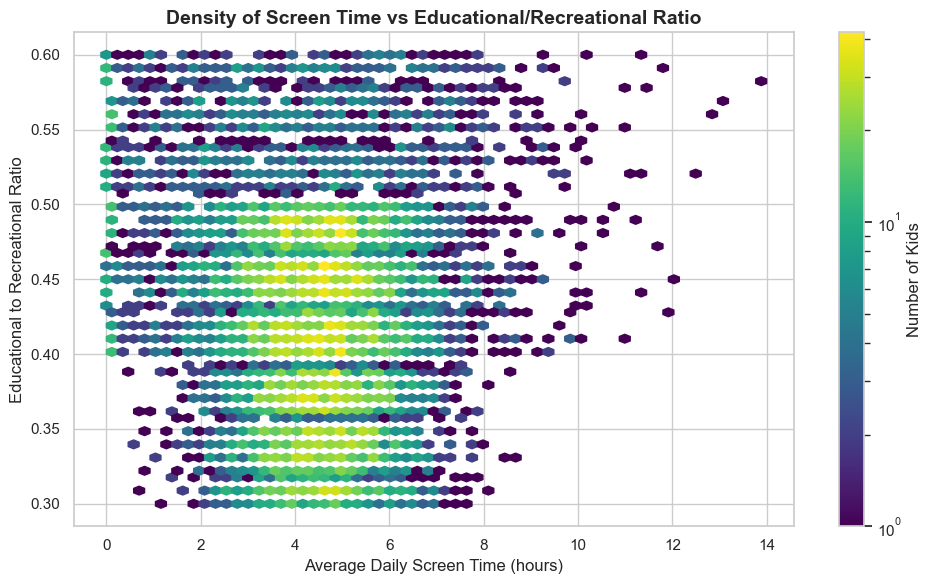

In [50]:
# Hexbin chart 
plt.figure(figsize=(10,6))
plt.hexbin(df['Avg_Daily_Screen_Time_hr'], df['Educational_to_Recreational_Ratio'], 
          gridsize=60, cmap='viridis', mincnt=1, bins='log')  
plt.colorbar(label='Number of Kids')
plt.xlabel('Average Daily Screen Time (hours)')
plt.ylabel('Educational to Recreational Ratio')
plt.title('Density of Screen Time vs Educational/Recreational Ratio', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Educator

In [52]:
#Scatter Plot for Screen time and age

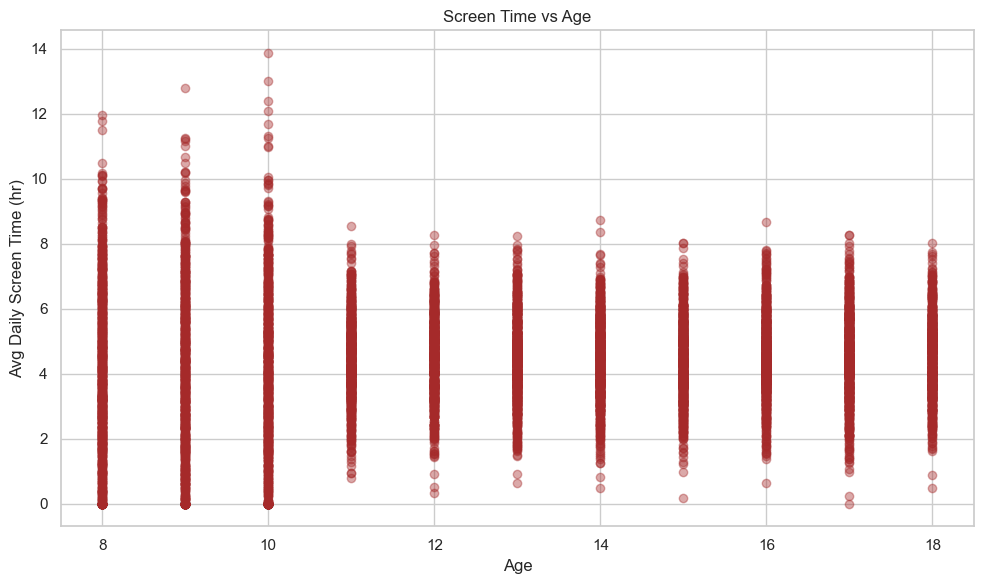

In [55]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Avg_Daily_Screen_Time_hr'], alpha=0.4, color='brown')
plt.xlabel('Age')
plt.ylabel('Avg Daily Screen Time (hr)')
plt.title('Screen Time vs Age')
plt.grid(True)
plt.tight_layout()
plt.show()

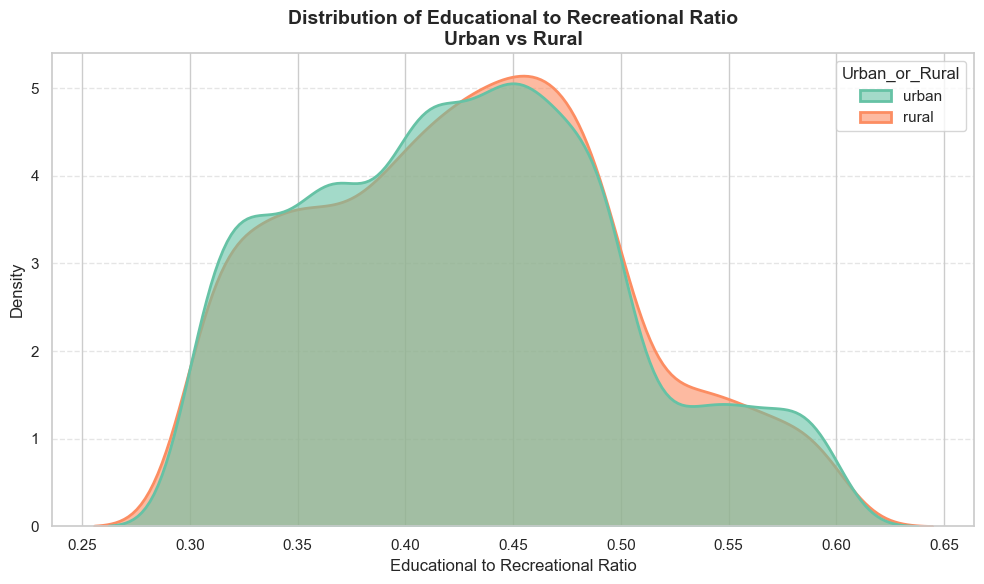

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Density plot
sns.kdeplot(
    data=df,
    x='Educational_to_Recreational_Ratio',
    hue='Urban_or_Rural',
    fill=True,
    common_norm=False,
    palette='Set2',
    alpha=0.6,
    linewidth=2
)


plt.title('Distribution of Educational to Recreational Ratio\nUrban vs Rural', fontsize=14, fontweight='bold')
plt.xlabel('Educational to Recreational Ratio')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Policymaker

In [62]:
#Public Health Priority Matrix

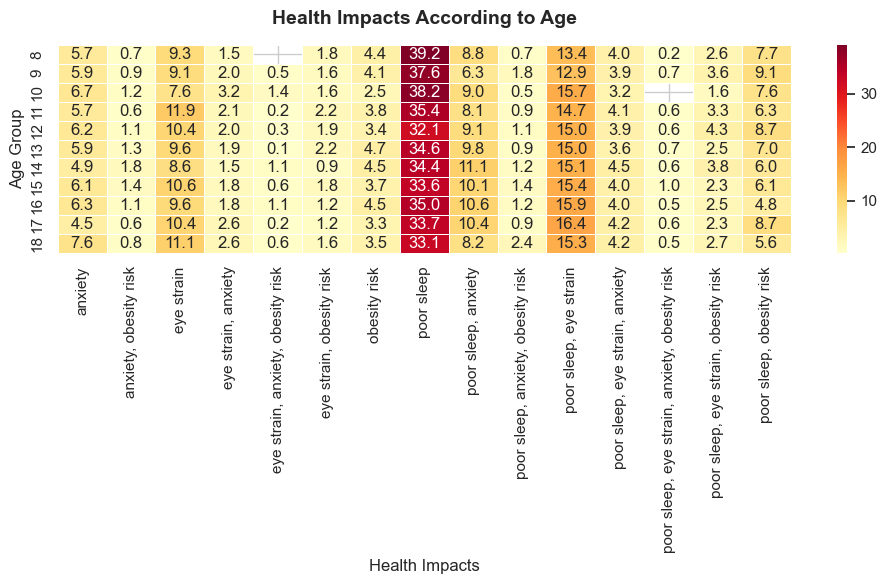

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = (
    df.groupby(['Age', 'Health_Impacts'])
      .size()
      .reset_index(name='Count')
)


heatmap_data['Percentage'] = heatmap_data.groupby('Age')['Count'].transform(lambda x: 100 * x / x.sum())


pivot_table = heatmap_data.pivot(index='Age', columns='Health_Impacts', values='Percentage')


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlOrRd', linewidths=0.5)

plt.title('Health Impacts According to Age', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Health Impacts', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#Screen Time vs Age

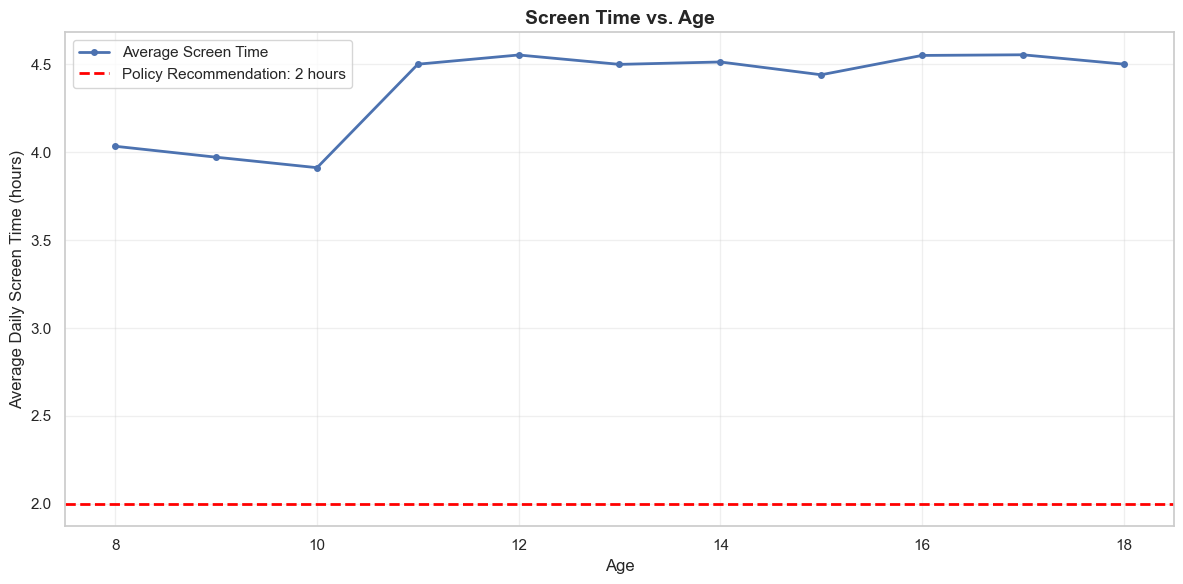

In [68]:
import numpy as np


age_avg = df.groupby('Age')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(age_avg['Age'], age_avg['Avg_Daily_Screen_Time_hr'], 
         marker='o', linewidth=2, markersize=4, label='Average Screen Time')


policy_limit = 2
plt.axhline(y=policy_limit, color='red', linestyle='--', linewidth=2, 
           label=f'Policy Recommendation: {policy_limit} hours')

plt.xlabel('Age')
plt.ylabel('Average Daily Screen Time (hours)')
plt.title('Screen Time vs. Age', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()